<h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">Title: Unemployement rate in India</h1>

<h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">👨‍💻Author: Muhammad Mubashir</h1>

[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/muhammad-mubashir-4441072ba/)


[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:mubashir.dev.02@gmail.com)


`Dataset:` [Unemployement in india](https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india)\
`Date: `2024/06/07

## About Dataset
### Context
The story behind this datasets is how lock-down affects employment opportunities and how the unemployment rate increases during the Covid-19.

### Content
This dataset contains the unemployment rate of all the states in India

`Region` = states in India\
`Date` = date which the unemployment rate observed\
`Frequency` = measuring frequency (Monthly)\
`Estimated Unemployment Rate (%)` = percentage of people unemployed in each States of India\
`Estimated Employed`= percentage of people employed\
`Estimated Labour Participation Rate (%)` = labour force participation rate by dividing the number of people actively participating in the labour force by the total number of people eligible to participate in the labor force


### Acknowledgements
I wouldn't be here without the help of my friends. I owe you thanks !!

### Inspiration
questions?

`1. How Covid-19 affects the employment`\
`2. how far the unemployment rate will go`


### Objective
Our primary objective is to analyze the impact of the COVID-19 pandemic on employment in India. We are examining data that provides insights into unemployment rates across various states. This dataset includes key information such as state names, observation dates, measurement frequency, unemployment percentages, estimated employment figures, and workforce participation rates.


### source of datasets
https://unemploymentinindia.cmie.com/

In [83]:
# importing all libraries there that will be used in this project

# to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [84]:
# let's load the dataset
df = pd.read_csv('./Unemployment in India.csv')

In [85]:
# let's print the first five rows of data
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


## **1. Check For Missg values**

In [86]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [88]:
df.shape

(768, 7)

- 768 - 740 = 28 rows are  missing

### drop rows with missing values would be the best option because there are 28 rows with missing values

In [89]:
# drop missing values
df.dropna(axis = 0, inplace = True)

In [90]:
# again check for missing values
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

- Missing values are dropped

## **2. Check for Duplicate values**

In [91]:
df.duplicated().sum()

0

## **3. Descriptive Statistics**

In [92]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


## **4. Exploring the data**

### 4.1 Bar plot of region with estimated unemployment rate to check the unemployement region wise

In [93]:
# Bar Plot of Average Estimated Unemployment Rate
fig = px.bar(df, x = "Region", y = " Estimated Unemployment Rate (%)", color = "Region", title = "Average unemploment Rate")
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

- Region with highest unemployement rate is `Tripura`
- Region with lowest unemployement rate is `Sikkim`

## 4.2 Bar plot of people employed in each region

In [94]:
# Bar Plot of people employed in each region
fig = px.bar(df, x = "Region", y = " Estimated Employed", color = "Region", title = "People employed in each region")
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

- Region with highest people employed is `Uttar Pradesh`
- Region with lowest people employed is `Sikkim`

### 4.3 Boxplot of Estimated Unemployment Rate by Region

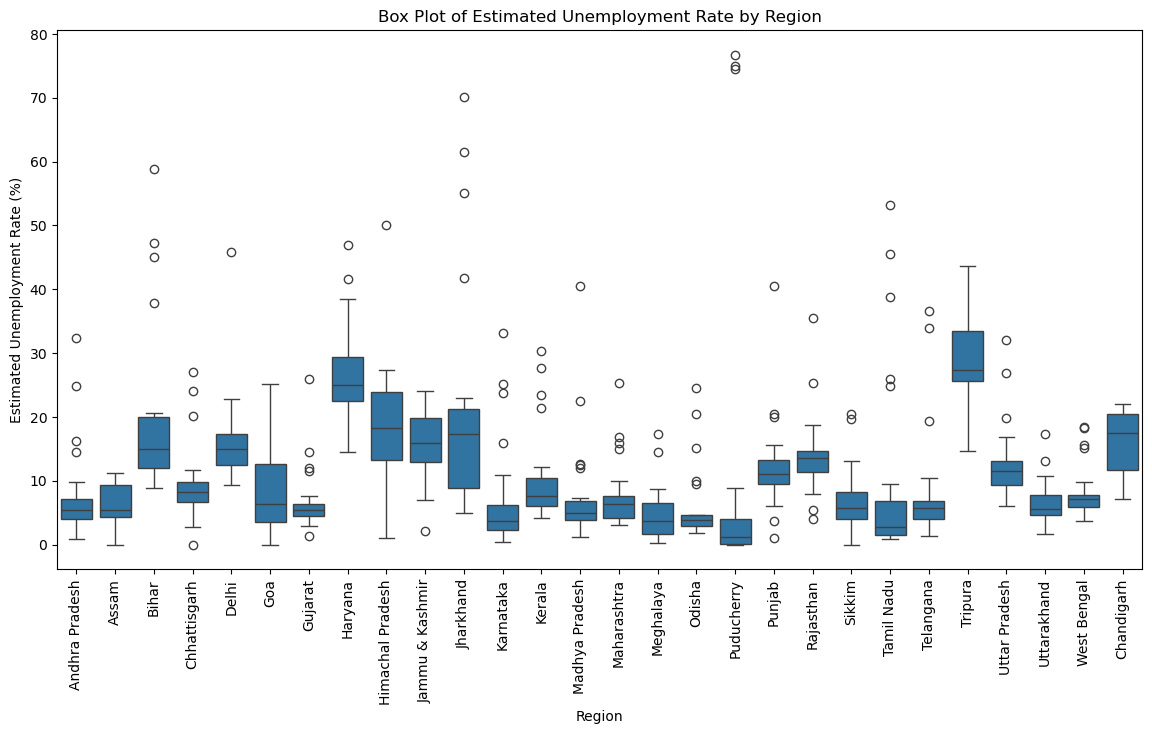

In [95]:
plt.figure(figsize=(14, 7))
# Create the box plot with separate colors for each region
sns.boxplot(x='Region', y=' Estimated Unemployment Rate (%)', data=df)
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# Add title and axis labels
plt.title('Box Plot of Estimated Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')

# Show the plot
plt.show()

## 4.4 Pie chart of Area wise Unemployment Rate

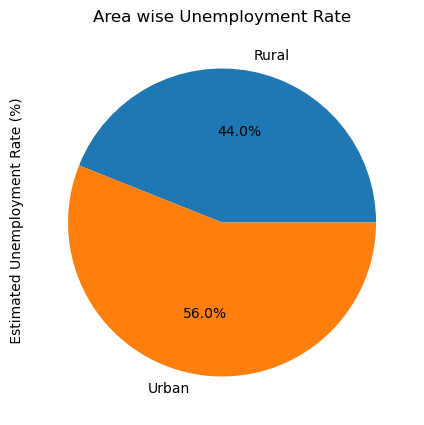

In [96]:
# area wise unemployment rate using pie chart
plt.figure(figsize=(10,5))
df.groupby('Area')[' Estimated Unemployment Rate (%)'].mean().plot(kind='pie', autopct='%1.1f%%')
plt.title('Area wise Unemployment Rate')
plt.show()

- urban area has highest unemployement rate

### 4.5 Heatmap of Correlation Matrix

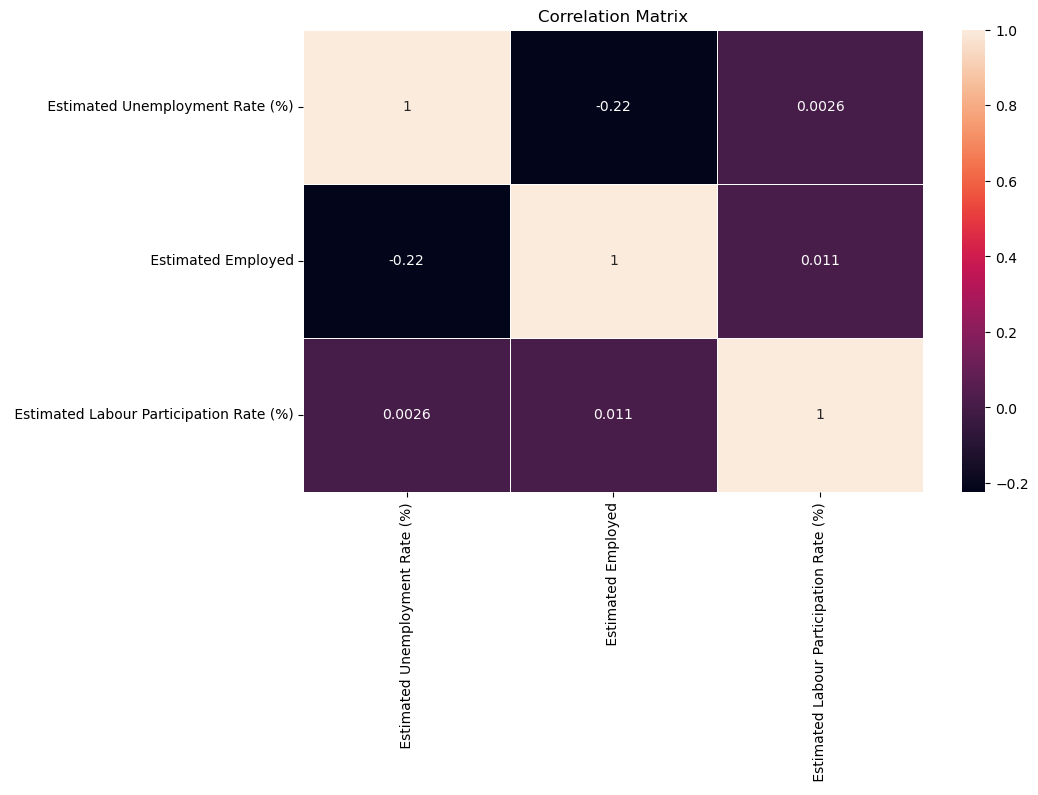

In [97]:
# Heatmap
plt.figure(figsize=(10, 6))
corr = df[[' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']].corr()
sns.heatmap(corr, annot=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

- As unemployment rates increase, the number of employed individuals tends to decrease, indicating an inverse relationship.
- Variations in unemployment rates have little impact on overall labor force participation.
- A rise in employment may slightly boost labor force participation, but this effect is not very pronounced.

## **5. Summary of findings**

In [98]:
avg_unemployement_over_time = df.groupby(' Date')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).reset_index()
avg_unemployement_over_region = df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).reset_index()
avg_people_employed_over_region = df.groupby('Region')[' Estimated Employed'].mean().sort_values(ascending=False).reset_index()
avg_labour_part_rate_over_region = df.groupby('Region')[' Estimated Labour Participation Rate (%)'].mean().sort_values(ascending=False).reset_index()
avg_unemployement_area_wise = df.groupby('Area')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).reset_index()
highest_unemployement_rate_month = df.groupby(' Date')[' Estimated Unemployment Rate (%)'].max().sort_values(ascending=False).reset_index()

# print all the dataframes
print("Average Unemployment Rate over time\n", avg_unemployement_over_time)
print("\nAverage Unemployment Rate over Region\n", avg_unemployement_over_region)
print("\nAverage People employed over Region\n", avg_people_employed_over_region)
print("\nAverage Labour Participation Rate over Region\n", avg_labour_part_rate_over_region)
print("\nAverage Unemployment Rate over Area\n", avg_unemployement_area_wise)
print("\nHighest Unemployment Rate Month wise\n", highest_unemployement_rate_month)


Average Unemployment Rate over time
            Date  Estimated Unemployment Rate (%)
0    31-05-2020                        24.875294
1    30-04-2020                        23.641569
2    30-06-2020                        11.903600
3    31-03-2020                        10.700577
4    29-02-2020                         9.964717
5    31-01-2020                         9.950755
6    31-10-2019                         9.900909
7    30-11-2019                         9.868364
8    31-08-2019                         9.637925
9    31-12-2019                         9.497358
10   30-06-2019                         9.303333
11   30-09-2019                         9.051731
12   31-07-2019                         9.033889
13   31-05-2019                         8.874259

Average Unemployment Rate over Region
               Region   Estimated Unemployment Rate (%)
0            Tripura                         28.350357
1            Haryana                         26.283214
2          Jharkhand   